# Google Trends and Data Visualisation

## Introduction

Google Trends provides an approximation of search activity. We can investigate whether search trends correlate with other data sets. For instance, there might be connections between Google's search volume and the value of assets like Bitcoin or high-performing stocks such as Tesla. Additionally, analyzing search frequency for terms like "Unemployment Benefits" could potentially yield insights into real-world unemployment rates.

This notebook utilizes four datasets:

1. Comparison of Search Volume for Unemployment Benefits and Unemployment Rate, featuring columns for month, web search data related to unemployment benefits, and the unemployment rate.
2. Trend Analysis of Tesla Searches versus Stock Price, comprising columns for month, web search data pertaining to Tesla, and the closing stock value.
3. Trend Analysis of Bitcoin Searches, with columns for month and web search data concerning Bitcoin.
4. Daily Bitcoin Price Data, including daily Bitcoin closing price and volume.

Data Sources: <br>
<ul>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Read the Data

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Web Search vs UE Rate_2004-19.csv')

## Data Exploration

<ul>
<li>Determine the shapes of the dataframes.</li>
<li>Count the number of rows and columns.</li>
<li>Identify the column names.</li>
<li>Display the largest/smallest number in the search data column.</li>
<li>Obtain useful descriptive statistics.</li>
</ul>

### Tesla

In [3]:
print(f"Number of rows: {df_tesla.shape[0]}, number of columns: {df_tesla.shape[1]}")
print(f"Column names: {df_tesla.columns}")
print(df_tesla.head())
print(df_tesla.tail())

Number of rows: 163, number of columns: 3
Column names: Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                9        1.298667
1  2010-07-01                9        1.360667
2  2010-08-01                7        1.456000
3  2010-09-01                7        2.355333
4  2010-10-01                8        1.775333
          MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
158  2023-08-01               74      200.839996
159  2023-09-01               72      240.080002
160  2023-10-01               70      248.479996
161  2023-11-01               64      187.289993
162  2023-12-01               72      201.880005


In [4]:
print(f'Largest value for Tesla in Web Search: {max(df_tesla["TSLA_WEB_SEARCH"])}')
print(f'Smallest value for Tesla in Web Search: {min(df_tesla["TSLA_WEB_SEARCH"])}')

Largest value for Tesla in Web Search: 100
Smallest value for Tesla in Web Search: 7


From Google Trends: "Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means that there was not enough data for this term."

In [5]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,163.00000,163.000000
mean,39.06135,74.045750
std,25.61411,104.134108
min,7.00000,1.298667
25%,19.00000,12.219000
50%,32.00000,16.795334
75%,63.00000,136.174995
max,100.00000,381.586670


### Unemployment Data

In [6]:
print(df_unemployment.shape)
print(df_unemployment.head())
print(df_unemployment.tail())
print(df_unemployment.columns)

(181, 3)
        MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01-01                      11     5.7
1  2004-02-01                       9     5.6
2  2004-03-01                       8     5.8
3  2004-04-01                       8     5.6
4  2004-05-01                       7     5.6
          MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
176  2018-09-01                       3     3.7
177  2018-10-01                       4     3.8
178  2018-11-01                       3     3.8
179  2018-12-01                       4     3.9
180  2019-01-01                       5     4.0
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


In [7]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')
print('Smallest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].min()}')

Largest value for "Unemployemnt Benefits" in Web Search: 39
Smallest value for "Unemployemnt Benefits" in Web Search: 3


In [8]:
print(df_unemployment.describe())

       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                 9.900552    6.218785
std                  7.421519    1.890644
min                  3.000000    3.700000
25%                  5.000000    4.700000
50%                  7.000000    5.400000
75%                 11.000000    7.800000
max                 39.000000   10.000000


### Bitcoin

In [9]:
print(df_btc_search.shape)
print(df_btc_search.head())
print(df_btc_search.tail())
print(df_btc_search.columns)

(114, 2)
        MONTH  BTC_NEWS_SEARCH
0  2014-09-01                3
1  2014-10-01                3
2  2014-11-01                3
3  2014-12-01                3
4  2015-01-01                3
          MONTH  BTC_NEWS_SEARCH
109  2023-10-01               21
110  2023-11-01               22
111  2023-12-01               26
112  2024-01-01               31
113  2024-02-01               30
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')


In [10]:
print(df_btc_price.shape)
print(df_btc_price.head())
print(df_btc_price.tail())
print(df_btc_price.columns)

(3453, 3)
         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0
            DATE        CLOSE        VOLUME
3448  2024-02-25  51733.23828  1.541324e+10
3449  2024-02-26  54522.40234  3.407441e+10
3450  2024-02-27  57085.37109  4.975683e+10
3451  2024-02-28  62504.78906  8.323916e+10
3452  2024-02-29  61198.38281  6.549661e+10
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')


In [11]:
print(df_btc_search.describe())

       BTC_NEWS_SEARCH
count       114.000000
mean         20.192982
std          17.221039
min           3.000000
25%           6.250000
50%          17.000000
75%          25.750000
max         100.000000


In [12]:
print(df_btc_price.describe())

              CLOSE        VOLUME
count   3452.000000  3.452000e+03
mean   15130.560628  1.674188e+10
std    16589.101078  1.905685e+10
min      178.102997  5.914570e+06
25%      972.184998  1.851150e+08
50%     8443.462402  1.214983e+10
75%    26014.261230  2.707957e+10
max    67566.828130  3.510000e+11


In [13]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')
print(f'smallest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].min()}')

largest BTC News Search: 100
smallest BTC News Search: 3


## Data Cleaning

### Check for Missing Values

In [14]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [15]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [16]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')
df_btc_price[df_btc_price["CLOSE"].isna()]

Number of missing values: 2


,DATE,CLOSE,VOLUME
3291,2023-09-21,NaN,NaN


In [17]:
#Remove missing values
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

In [18]:
print(type(df_tesla["MONTH"][0]))
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])
print(type(df_tesla["MONTH"][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [19]:
print(type(df_unemployment["MONTH"][0]))
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])
print(type(df_unemployment["MONTH"][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
print(type(df_btc_search["MONTH"][0]))
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])
print(type(df_btc_search["MONTH"][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [21]:
print(type(df_btc_price["DATE"][0]))
df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"])
print(type(df_btc_price["DATE"][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Converting from Daily to Monthly Data

In [22]:
# The price at month-end
df_btc_monthly_last = df_btc_price.resample("M", on="DATE").last()
# The average price over the course of the month
df_btc_monthly_mean = df_btc_price.resample("M", on="DATE").mean()

In [23]:
print(df_btc_monthly_last.shape)
df_btc_monthly_last.head()

(114, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


## Data Visualisation

### Notebook Formatting & Style Helpers

In [24]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

### Tesla Stock Price v.s. Search Volume

Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes.

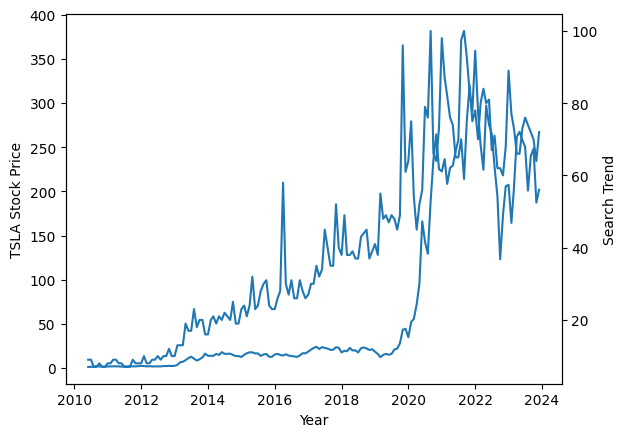

In [25]:
ax1 = plt.gca()
ax2 = plt.twinx()

ax1.set_xlabel("Year")
ax1.set_ylabel("TSLA Stock Price")
ax2.set_ylabel("Search Trend")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

plt.show()

Add colours to style the chart.

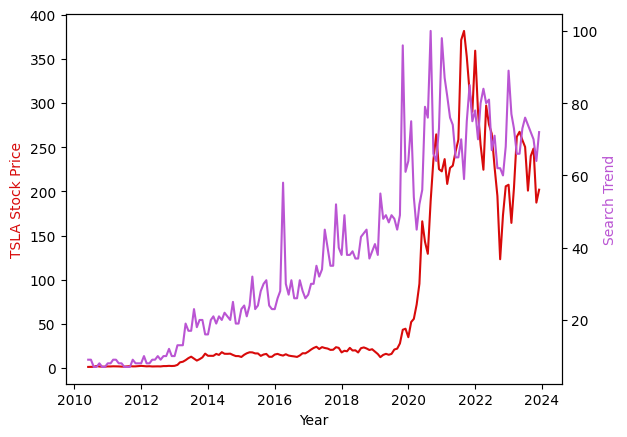

In [26]:
ax1 = plt.gca()
ax2 = plt.twinx()

ax1.set_xlabel("Year")
ax1.set_ylabel("TSLA Stock Price", color="#D80A0A")
ax2.set_ylabel("Search Trend", color="mediumorchid")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#D80A0A")
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="mediumorchid")

plt.show()

Make the chart larger and easier to read.

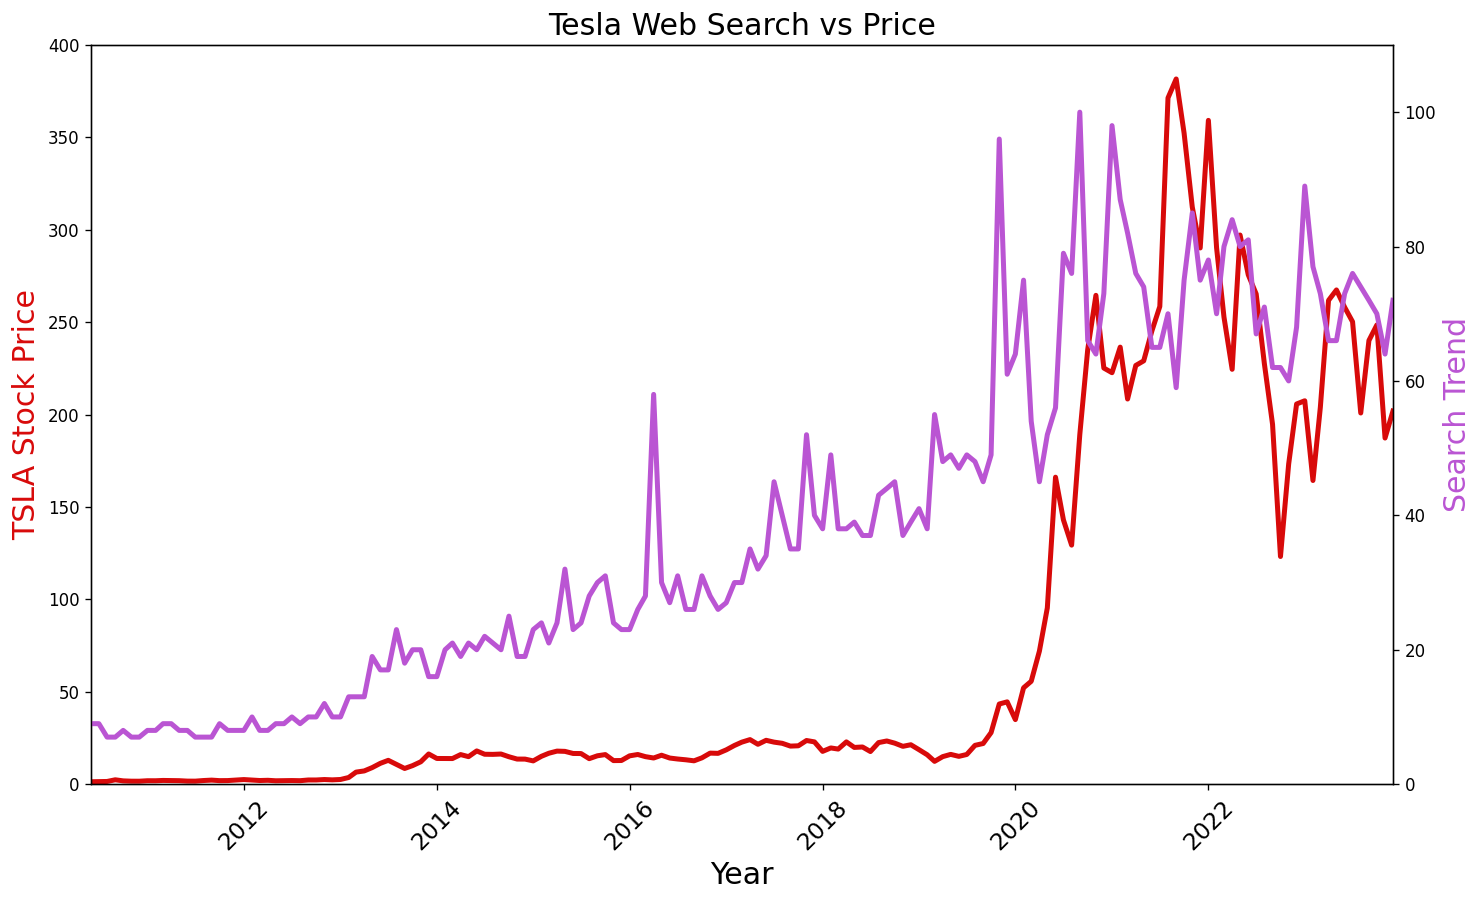

In [27]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Tesla Web Search vs Price", fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.set_xlabel("Year", fontsize=18)
ax1.set_ylabel("TSLA Stock Price", color="#D80A0A", fontsize=18)
ax2.set_ylabel("Search Trend", color="mediumorchid", fontsize=18)
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_ylim([0, 400])
ax2.set_ylim([0, 110])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#D80A0A", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="mediumorchid", linewidth=3)

plt.show()

Add tick formatting for dates on the x-axis.

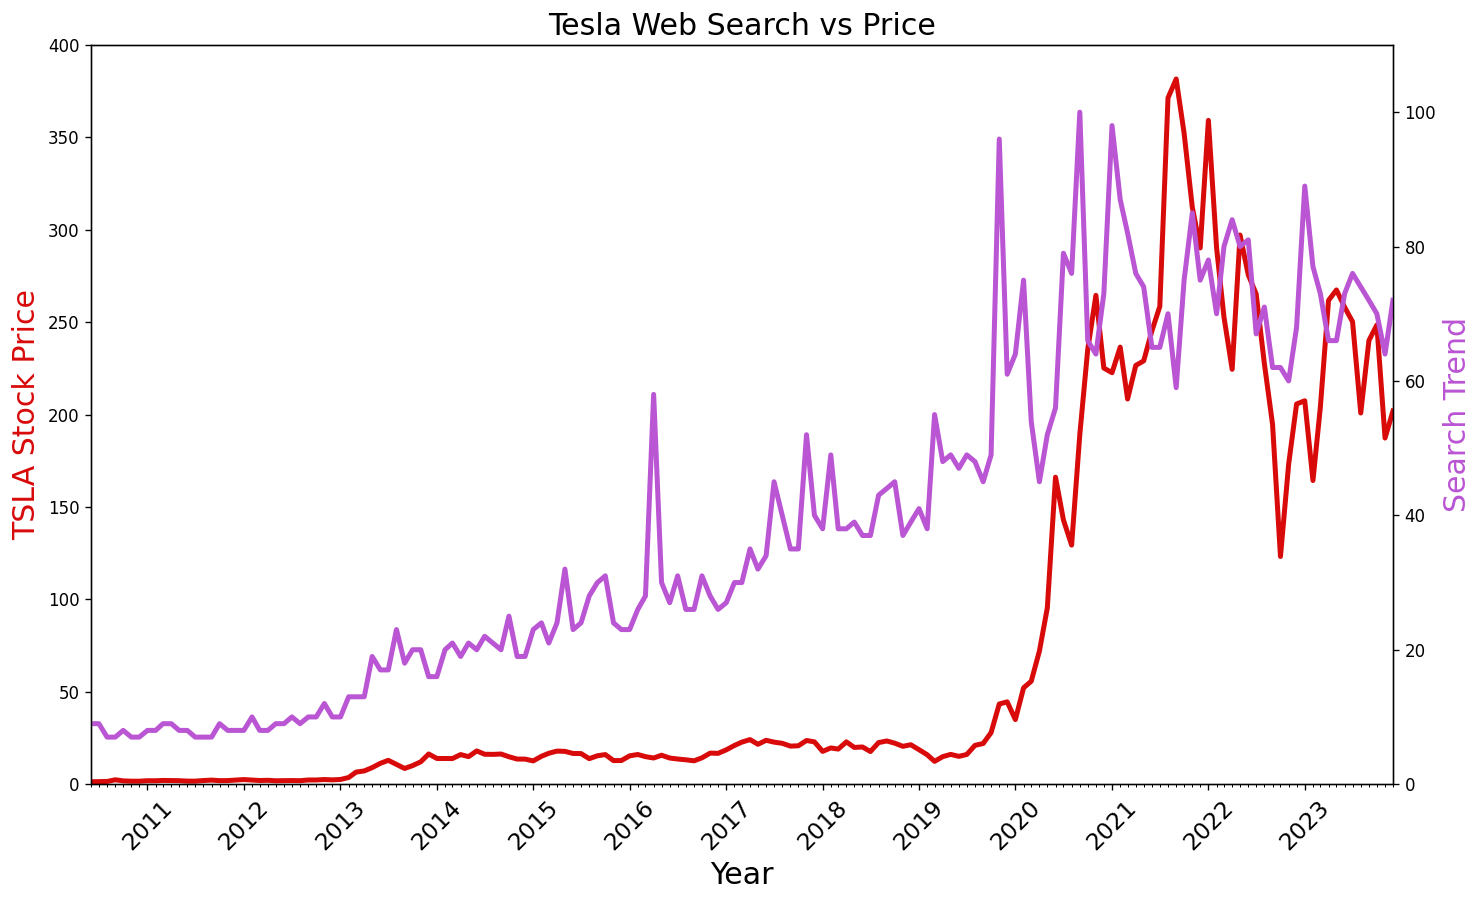

In [28]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Tesla Web Search vs Price", fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.set_xlabel("Year", fontsize=18)
ax1.set_ylabel("TSLA Stock Price", color="#D80A0A", fontsize=18)
ax2.set_ylabel("Search Trend", color="mediumorchid", fontsize=18)
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
ax1.set_ylim([0, 400])
ax2.set_ylim([0, 110])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#D80A0A", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="mediumorchid", linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

Create the same chart for the Bitcoin Prices vs. Search volumes.

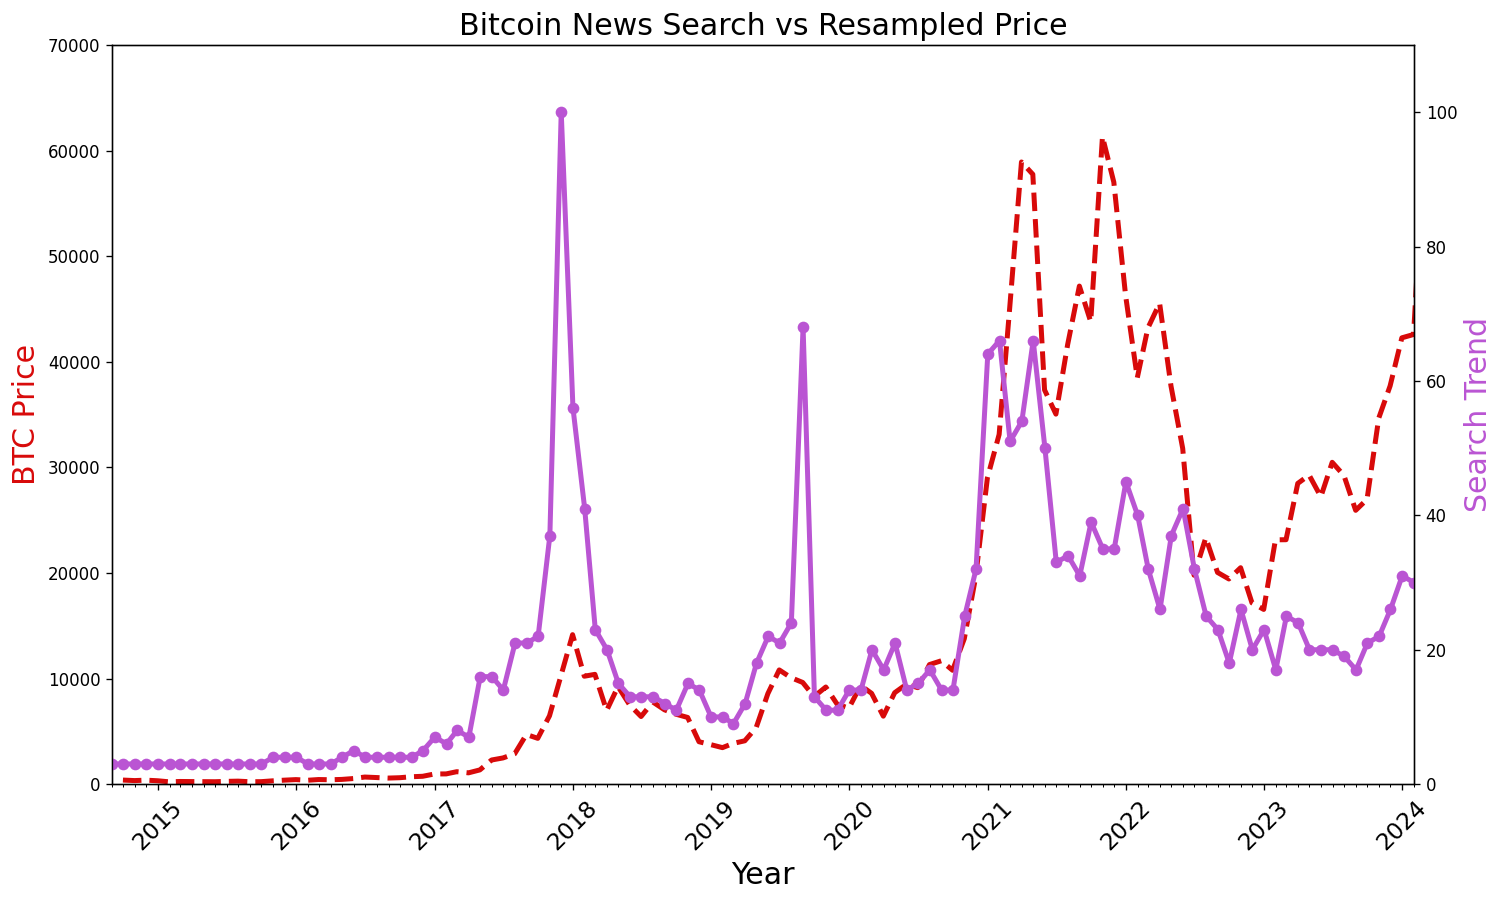

In [29]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Bitcoin News Search vs Resampled Price", fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.set_xlabel("Year", fontsize=18)
ax1.set_ylabel("BTC Price", color="#D80A0A", fontsize=18)
ax2.set_ylabel("Search Trend", color="mediumorchid", fontsize=18)
ax1.set_xlim([df_btc_search.MONTH.min(), df_btc_search.MONTH.max()])
ax1.set_ylim([0, 70000])
ax2.set_ylim([0, 110])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_btc_monthly_last.index, df_btc_monthly_last.CLOSE, color="#D80A0A", linewidth=3, linestyle="dashed")
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color="mediumorchid", linewidth=3, marker="o")

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

Plot the search for "unemployment benefits" against the unemployment rate.

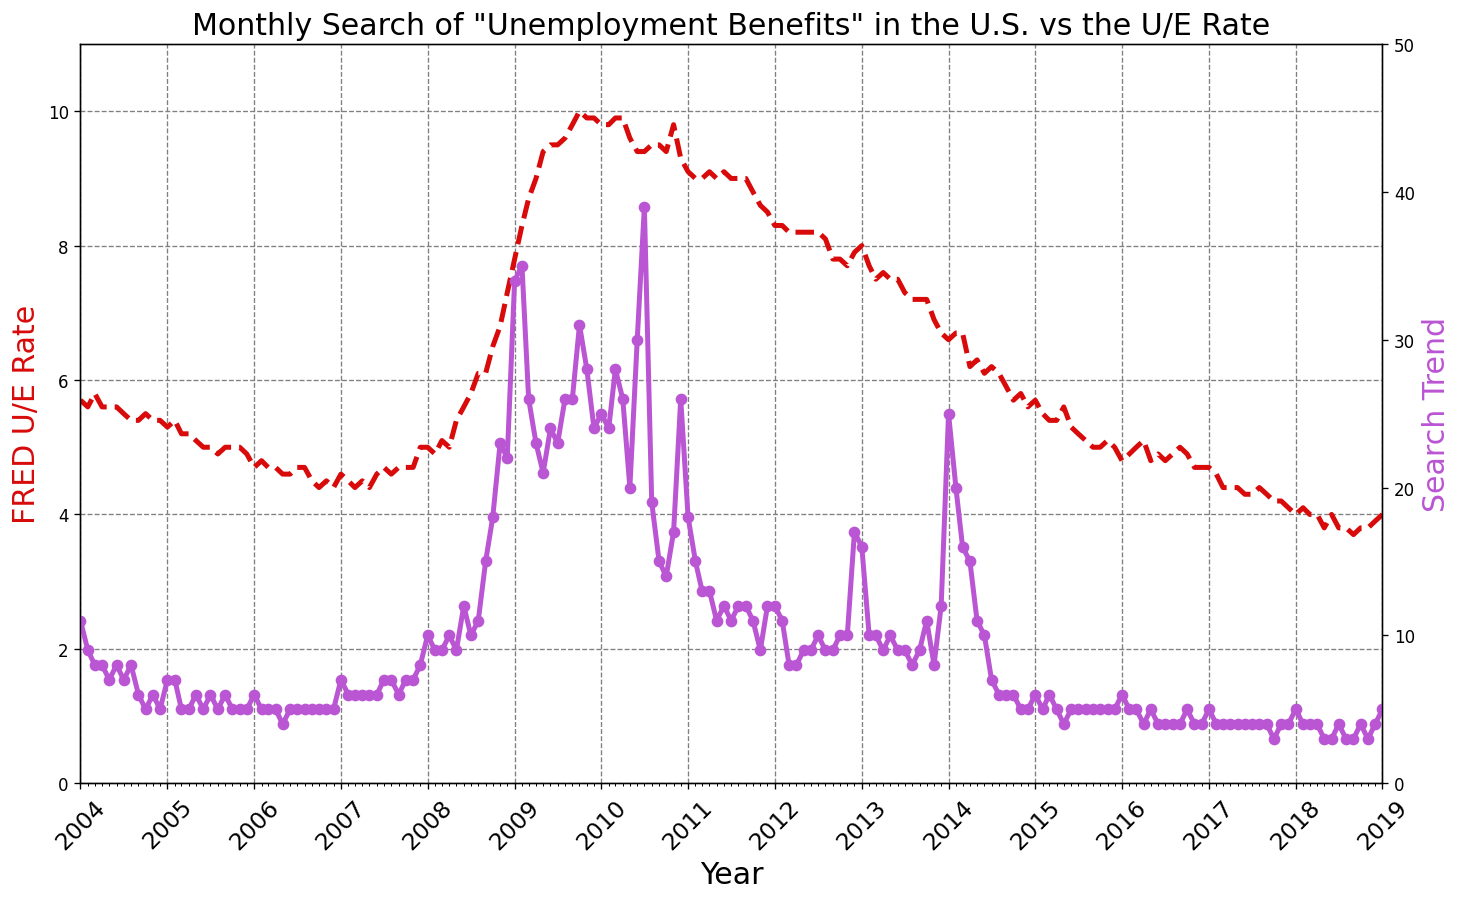

In [30]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.grid(color='gray', linestyle="--")

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.set_xlabel("Year", fontsize=18)
ax1.set_ylabel("FRED U/E Rate", color="#D80A0A", fontsize=18)
ax2.set_ylabel("Search Trend", color="mediumorchid", fontsize=18)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.set_ylim([0, 11])
ax2.set_ylim([0, 50])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="#D80A0A", linewidth=3, linestyle="dashed")
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color="mediumorchid", linewidth=3, marker="o")

plt.show()

Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment.

In [31]:
rolling_6_month = df_unemployment[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(window=6).mean()

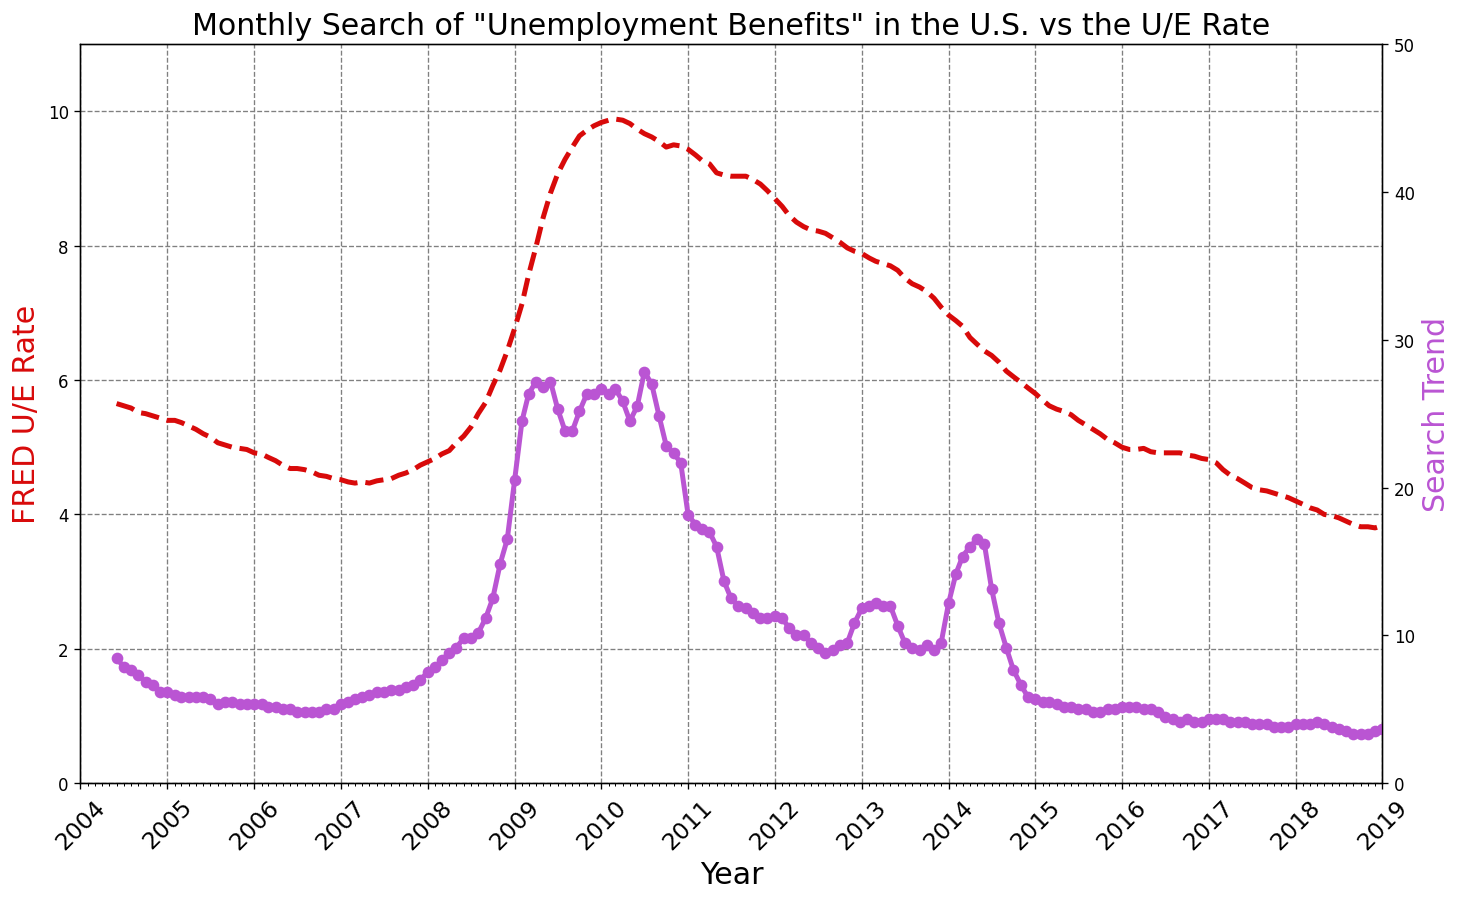

In [32]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.grid(color='gray', linestyle="--")

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.set_xlabel("Year", fontsize=18)
ax1.set_ylabel("FRED U/E Rate", color="#D80A0A", fontsize=18)
ax2.set_ylabel("Search Trend", color="mediumorchid", fontsize=18)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
ax1.set_ylim([0, 11])
ax2.set_ylim([0, 50])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_unemployment.MONTH, rolling_6_month.UNRATE, color="#D80A0A", linewidth=3, linestyle="dashed")
ax2.plot(df_unemployment.MONTH, rolling_6_month.UE_BENEFITS_WEB_SEARCH, color="mediumorchid", linewidth=3, marker="o")

plt.show()

### Including data to 2024 in Unemployment Charts

Read the data in the 'UE Benefits Search vs UE Rate 2004-24.csv' into a DataFrame.
Convert the MONTH column to Pandas Datetime objects and then plot the chart.

In [33]:
df_unemployment_2020 = pd.read_csv("UE Benefits Web Search vs UE Rate_2004-24.csv")
df_unemployment_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,11,5.7
1,2004-02-01,9,5.6
2,2004-03-01,8,5.8
3,2004-04-01,8,5.6
4,2004-05-01,7,5.6


In [34]:
print(type(df_unemployment_2020["MONTH"][0]))
df_unemployment_2020["MONTH"] = pd.to_datetime(df_unemployment_2020["MONTH"])
df_unemployment_2020.info()

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   241 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  241 non-null    int64         
 2   UNRATE                  241 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.8 KB


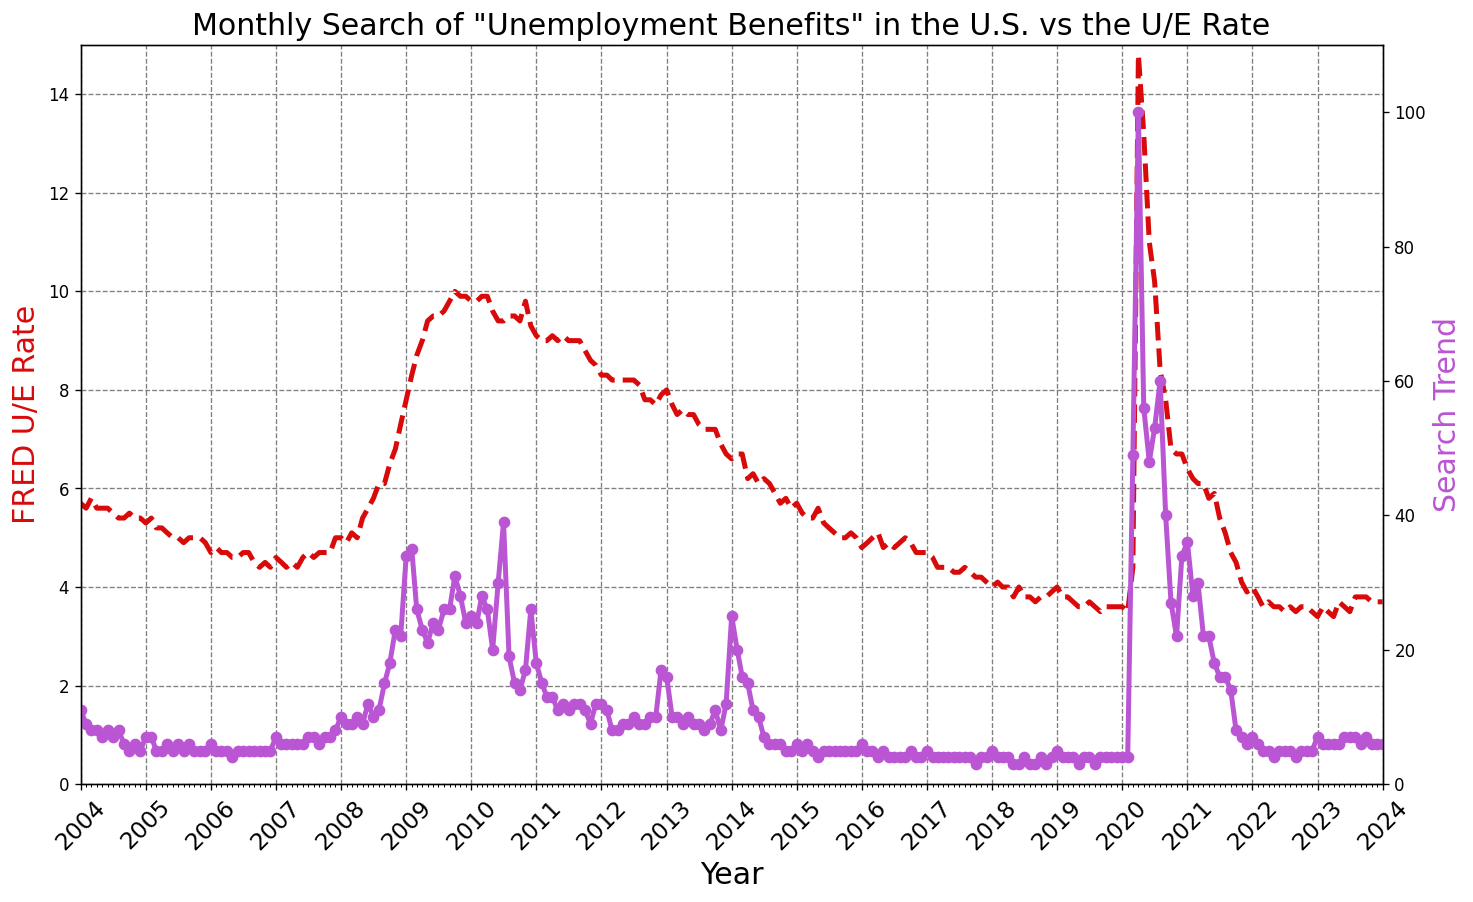

In [35]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.grid(color='gray', linestyle="--")

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.set_xlabel("Year", fontsize=18)
ax1.set_ylabel("FRED U/E Rate", color="#D80A0A", fontsize=18)
ax2.set_ylabel("Search Trend", color="mediumorchid", fontsize=18)
ax1.set_xlim([df_unemployment_2020.MONTH.min(), df_unemployment_2020.MONTH.max()])
ax1.set_ylim([0, 15])
ax2.set_ylim([0, 110])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_unemployment_2020.MONTH, df_unemployment_2020.UNRATE, color="#D80A0A", linewidth=3, linestyle="dashed")
ax2.plot(df_unemployment_2020.MONTH, df_unemployment_2020.UE_BENEFITS_WEB_SEARCH, color="mediumorchid", linewidth=3, marker="o")

plt.show()